In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("E:/teaching/classMaterial/dataEngineering/data/heart_attack/heart_attack_prediction_dataset.csv")

In [4]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### 資料縱覽

- 8673筆資料
- 26屬性欄位
- 3 浮點數型別，16 整數型別，7 object型別
- 記憶體使用 1.7+ MB

### 屬性意義
<pre>
 0   Patient ID                       8763 non-null   object 病人編號
 1   Age                              8763 non-null   int64  年齡
 2   Sex                              8763 non-null   object 性別
 3   Cholesterol                      8763 non-null   int64  膽固醇
 4   Blood Pressure                   8763 non-null   object 血壓
 5   Heart Rate                       8763 non-null   int64  心律
 6   Diabetes                         8763 non-null   int64  糖尿病
 7   Family History                   8763 non-null   int64  家族病史
 8   Smoking                          8763 non-null   int64  抽菸
 9   Obesity                          8763 non-null   int64  肥胖
 10  Alcohol Consumption              8763 non-null   int64  酒精消耗
 11  Exercise Hours Per Week          8763 non-null   float64一週運動時間
 12  Diet                             8763 non-null   object 節食
 13  Previous Heart Problems          8763 non-null   int64  心臟疾病
 14  Medication Use                   8763 non-null   int64  
 15  Stress Level                     8763 non-null   int64  
 16  Sedentary Hours Per Day          8763 non-null   float64
 17  Income                           8763 non-null   int64  
 18  BMI                              8763 non-null   float64
 19  Triglycerides                    8763 non-null   int64  
 20  Physical Activity Days Per Week  8763 non-null   int64  
 21  Sleep Hours Per Day              8763 non-null   int64  
 22  Country                          8763 non-null   object 
 23  Continent                        8763 non-null   object 
 24  Hemisphere                       8763 non-null   object 
 25  Heart Attack Risk                8763 non-null   int64  
 </pre>

In [6]:
df.shape

(8763, 26)

In [7]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

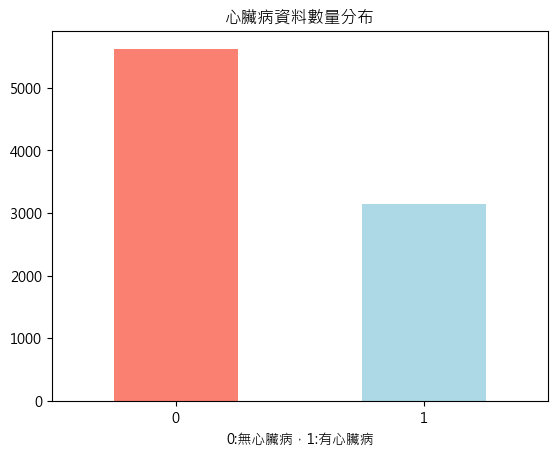

In [56]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
df['Heart Attack Risk'].value_counts().plot(kind='bar', color=color)
color=['salmon','lightblue']
plt.title("心臟病資料數量分布")
plt.xlabel("0:無心臟病，1:有心臟病")
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

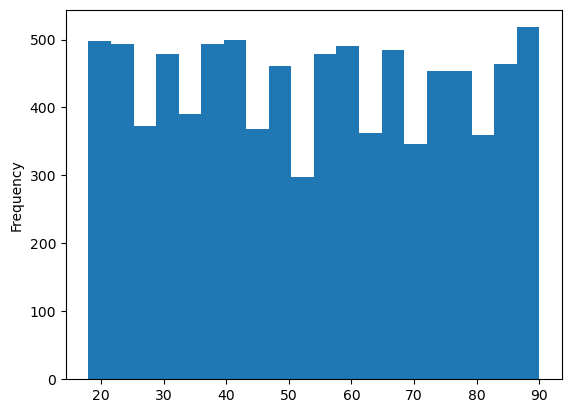

In [16]:
df['Age'].plot.hist(bins=20)

<Axes: xlabel='Country'>

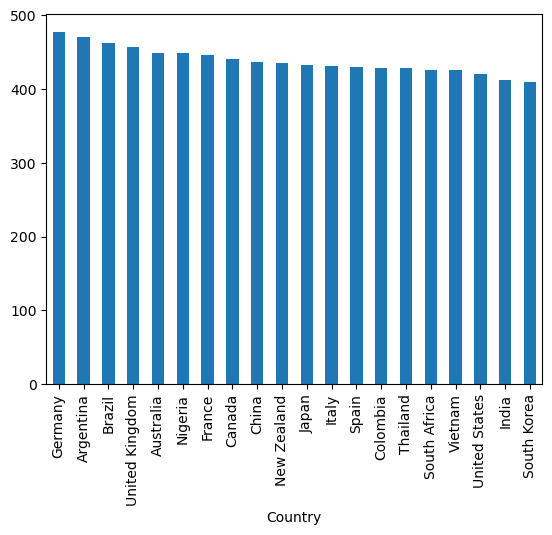

In [18]:
df['Country'].value_counts().plot.bar()

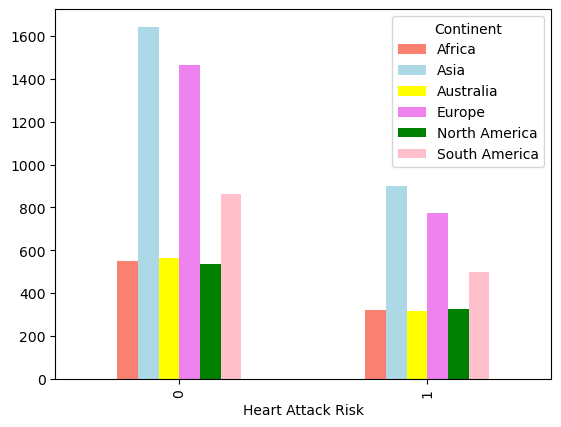

In [22]:
pd.crosstab(df['Heart Attack Risk'], df['Continent']).plot(kind='bar', color=color)
color=['salmon', 'lightblue', 'yellow', 'Violet', 'green', 'pink']

In [24]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [29]:
pd.crosstab(df['Heart Attack Risk'], df['Diet'])

Diet,Average,Healthy,Unhealthy
Heart Attack Risk,,,
0,1886,1881,1857
1,1026,1079,1034


In [32]:
df['Diet'].groupby(df['Heart Attack Risk']).value_counts()

Heart Attack Risk  Diet     
0                  Average      1886
                   Healthy      1881
                   Unhealthy    1857
1                  Healthy      1079
                   Unhealthy    1034
                   Average      1026
Name: count, dtype: int64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

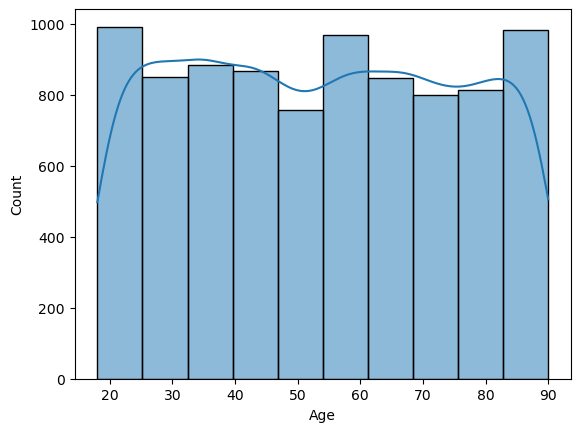

In [38]:
sns.histplot(df['Age'], kde=True, bins=10)

In [34]:
df['Age'].min()

18

In [35]:
df['Age'].max()

90

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Count'>

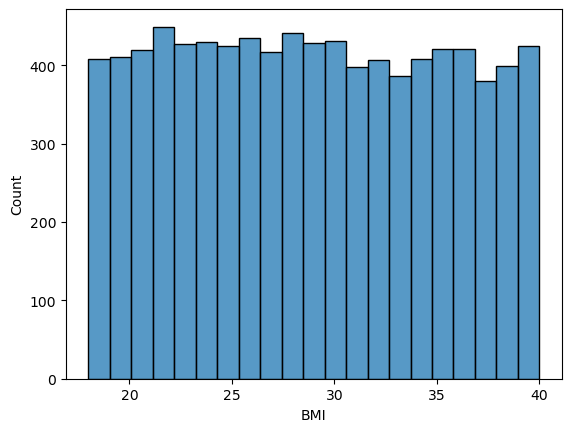

In [39]:
sns.histplot(df['BMI'])

In [42]:
df['Age'].mode()

0    90
Name: Age, dtype: int64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sex', ylabel='BMI'>

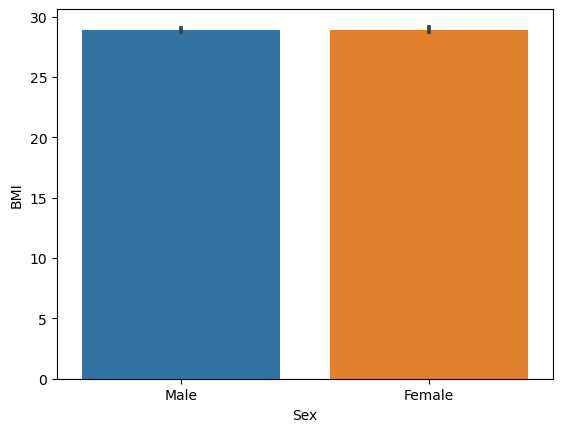

In [52]:
import matplotlib

In [53]:
matplotlib.matplotlib_fname()

'C:\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'